In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [29]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [30]:
data.reset_index(inplace = True)

In [31]:
data

Price        Date      Close       High        Low       Open     Volume
Ticker                  GOOG       GOOG       GOOG       GOOG       GOOG
0      2012-01-03  16.513794  16.581795  16.190173  16.204321  147611217
1      2012-01-04  16.585020  16.633911  16.394919  16.504364  114989399
2      2012-01-05  16.354963  16.478058  16.285971  16.432394  131808205
3      2012-01-06  16.131853  16.379531  16.126144  16.358435  108119746
4      2012-01-09  15.447884  16.056905  15.417357  16.044495  233776981
...           ...        ...        ...        ...        ...        ...
2756   2022-12-14  94.968758  96.871923  93.603668  95.197938   26452900
2757   2022-12-15  90.873482  93.693352  90.106242  93.205108   28298800
2758   2022-12-16  90.534698  91.421511  89.687743  90.873478   48485500
2759   2022-12-19  88.830818  90.873474  88.606625  90.554620   23020500
2760   2022-12-20  89.309105  89.458569  87.724801  88.412333   21976800

[2761 rows x 6 columns]

In [33]:
ma_100_days = data.Close.rolling(100).mean() 

<function matplotlib.pyplot.show(close=None, block=None)>

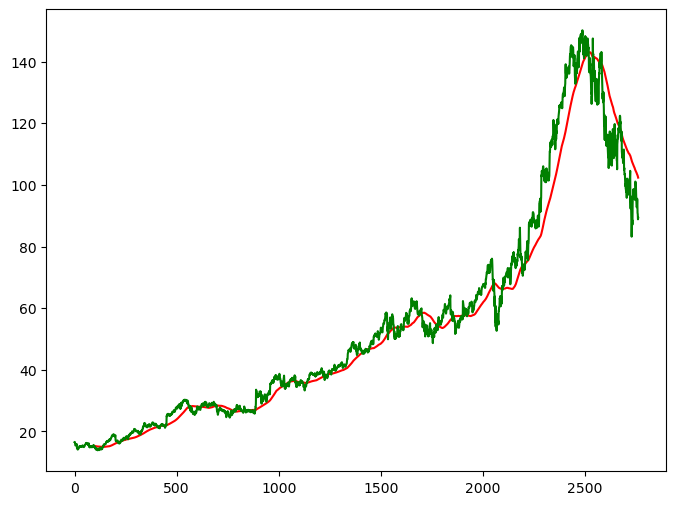

In [34]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show

In [35]:
ma_200_days = data.Close.rolling(200).mean()

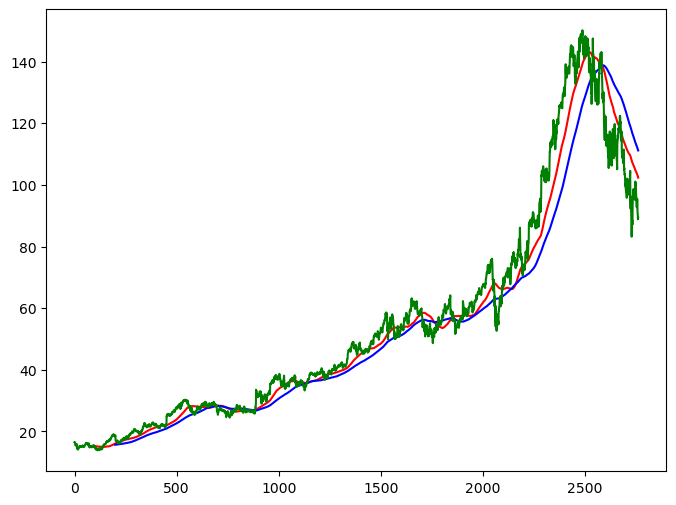

In [36]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [37]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [39]:
data_train.shape[0]

2208

In [40]:
data_test.shape[0]

553

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [42]:
data_train_scale = scaler.fit_transform(data_train)

In [46]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0]) 

In [52]:
x, y = np.array(x), np.array(y)

In [49]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [54]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [55]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [57]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.0670
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0071
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0066
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0060
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0058
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0066
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0047
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0043
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 0.0041
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0035
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0041
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0035
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 0.0035
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0035
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - lo

In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [59]:
pas_100_days = data_train.tail(100)

In [60]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [61]:
data_test_scale = scaler.fit_transform(data_test)

In [63]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0]) 
x, y = np.array(x), np.array(y)

In [64]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


In [65]:
scale = 1/scaler.scale_

In [66]:
y_predict = y_predict * scale 

In [67]:
y = y * scale 

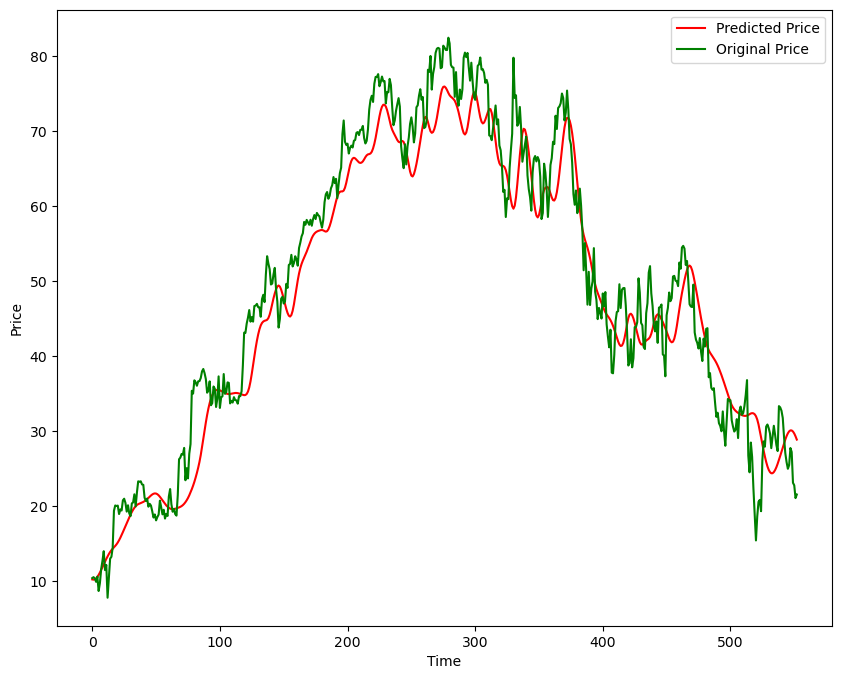

In [69]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [70]:
model.save('Stock Predictions Model.keras')